In [15]:
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType

getBlinded = Blinders(FitType.Omega_a, 'memes')

 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +


In [16]:
chain = r.TChain("farline/eventTree")
chain.Add("./9day/gm2offline_ana_233128_16528.00035.root")
chain.Add("./9day/gm2offline_ana_233130_16535.00353.root")
chain.Add("./9day/gm2offline_ana_233134_16482.00307.root")
chain.Add("./9day/gm2offline_ana_233136_16528.00161.root")

1

In [17]:
"""
Define the blinded wiggle function used for fitting
"""

def blinded_wiggle(x, p):
    N0          = p[0]
    T           = p[1]
    A0          = p[2]
    Phi0        = p[3]
    OmegaCBO    = p[4]
    TCBO        = p[5]
    ACBON       = p[6]
    PhiCBON     = p[7]
    ACBOA       = p[8]
    PhiCBOA     = p[9]
    ACBOPhi     = p[10]
    PhiCBOPhi   = p[11]
    OmegaVW     = p[12]
    TVW         = p[13]
    AVW         = p[14]
    PhiVW       = p[15]
    R           = p[16]
    
    time = x[0]
    omega = getBlinded.paramToFreq(R)
    
    return ( N0*( 1 + ACBON*math.exp(-time/TCBO)*math.cos(OmegaCBO*time - PhiCBON) )*
            ( 1 + AVW*math.exp(-time/TVW)*math.cos(OmegaVW*time - PhiCBON) )*
            math.exp(-time/T)*( 1 + ( A0*( 1 + ACBOA*math.exp(-time/TCBO)*math.cos(OmegaCBO*time - PhiCBOA) ) )*math.cos(omega*time - ( Phi0 + ACBOPhi*math.exp(-time/TCBO)*math.cos(OmegaCBO*time - PhiCBOPhi) )) ) )




func = r.TF1("func", blinded_wiggle, 30, 600, 17)

pars = {'N_{0}'           : 3.406*(10**6),
        '#tau'            : 64.438,
        'A_{0}'           : 37.587,
        '#phi_[0]'        : -2.0909,
        '#omega_{CBO}'    : 2.3048,
        '#tau_{CBO}'      : 170,
        'A_{CBO, N}'      : 0.45,
        '#phi_{CBO, N}'   : 1.8,
        'A_{CBO, A}'      : 0.04,
        '#phi_{CBO, A}'   : 0.5,
        'A_{CBO, #phi}'   : 0.0004,
        '#phi_{CBO, #phi}': -2,
        '#omega_{VW}'     : 14.39,
        '#tau_{VW}'       : 20,
        'A_{VW}'          : 0.8,
        '#phi_{VW}'       : 0.4,
        'R( #omega_{a} )' : 0}

i = 0
for name, value in pars.items():
    func.SetParName(i, name)
    func.SetParameter(i, value)
    i += 1

func.SetLineColor(3)
func.SetNpx(10000)

In [18]:


import sympy as sp

t_sp, Tau_sp, R_sp = sp.symbols("t \\tau R(\omega_{0})")
A0_sp, N0_sp, Phi0_sp = sp.symbols("A_{0} N_{0} \phi_{0}")
OmegaCBO_sp, TauCBO_sp = sp.symbols("\omega_{CBO} \\tau_{CBO}")
ACBOn_sp, PhiCBOn_sp = sp.symbols("A_{CBO\,N} \phi_{CBO\,N}")
ACBOa_sp, PhiCBOa_sp = sp.symbols("A_{CBO\,A} \phi_{CBO\,A}")
ACBOPhi_sp, PhiCBOPhi_sp = sp.symbols("A_{CBO\,\phi} \phi_{CBO\,\phi}")
OmegaVW_sp, TauVW_sp, AVW_sp, PhiVW_sp = sp.symbols("\omega_{VW} \\tau_{VW} A_{VW} \phi_{VW}")

In [19]:
h = r.TH2D("h","Wiggle Plot; Time [#mus]; Energy [MeV]", 10000,0,700, 600,0,6000)
chain.Draw("energy:time*1.25/1000.>>h","energy < 6000","goff")

eLow  = 1700
eHigh = 6000

binLow = h.GetYaxis().FindBin(eLow)
binHigh = h.GetYaxis().FindBin(eHigh)

h.GetXaxis().SetRangeUser(0,700)

h2 = h.ProjectionX("_px", binLow, binHigh).Clone("h2")
h2.GetYaxis().SetTitle("N / 148.9 ns")

Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


 FCN=2.69267e+06 FROM MIGRAD    STATUS=CALL LIMIT   4180 CALLS        4181 TOTAL
                     EDM=76415.5    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   9.3 per cent
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  N_{0}        1.77864e+07   1.33079e+04  -1.12734e+06   1.29071e-02
   2  #tau         5.34729e+00   5.09089e-04   3.85542e-02  -2.55143e+05
   3  A_{0}        2.65953e-01   1.66971e-04   5.52848e-03  -1.98149e+06
   4  #phi_[0]     2.76524e+00   9.21839e-04   2.11558e-03  -9.00660e+04
   5  #omega_{CBO}   2.09653e+00   4.95217e-05   9.32939e-04  -2.44444e+06
   6  #tau_{CBO}   5.13084e+01   1.89076e-01  -2.29218e+01  -1.87733e+03
   7  A_{CBO, N}   1.88930e-01   7.19264e-04   1.54023e-02   3.61335e+04
   8  #phi_{CBO, N}   2.09117e+00   2.43154e-03   1.74793e-01  -2.96143e+04
   9  A_{CBO, A}   2.85747e+00   1.17817e-03   3.38777e-02  -6.72551e+04
  10  #phi_{CBO, A}  -9.

Warning in <Fit>: Abnormal termination of minimization.


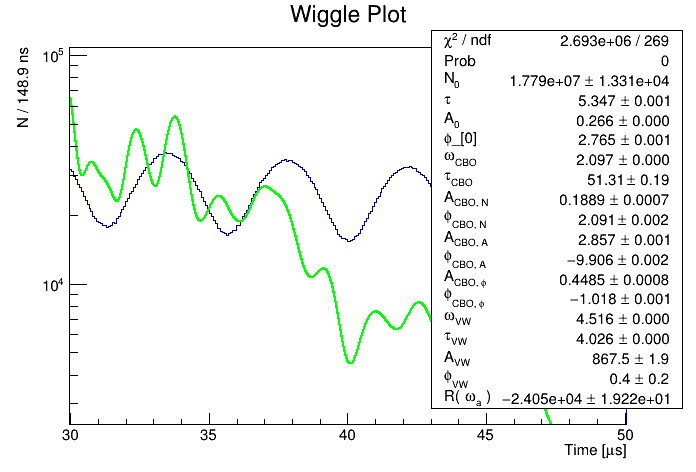

In [20]:
c = r.TCanvas()
r.gStyle.SetOptFit(1111)
r.gStyle.SetOptStat(0)
h2.Draw("colz")
h2.GetXaxis().SetRangeUser(30, 50)
h2.Fit("func", "REM")
c.SetLogy()
c.Draw()

So that didn't quite work, now to go at it slower:

In [21]:
"""
Define the blinded wiggle function used for fitting
"""

def blinded_wiggle_five_param(x, p):
    N0          = p[0]
    T           = p[1]
    A0          = p[2]
    Phi0        = p[3]
    R           = p[4]
    
    time = x[0]

    omega = getBlinded.paramToFreq(R)
    
    return N0 * math.exp(-time/T)*( 1 + ( A0 * math.cos(omega*time - Phi0) ) )


func_five_param = r.TF1("func_five_param", blinded_wiggle_five_param, 30, 600, 5)

pars = {'N_{0}'           : 3.406*(10**5),
        '#tau'            : 64.438,
        'A_{0}'           : 37.587,
        '#phi_[0]'        : -2.0909,
        'R( #omega_{a} )' : 0}

i = 0
for name, value in pars.items():
    func_five_param.SetParName(i, name)
    func_five_param.SetParameter(i, value)
    i += 1

func_five_param.SetLineColor(3)
func_five_param.SetNpx(10000)

 FCN=8966.52 FROM MINOS     STATUS=SUCCESSFUL     36 CALLS         700 TOTAL
                     EDM=6.2606e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  N_{0}        4.58055e+04   1.59335e+01   5.14870e-03  -8.16128e-10
   2  #tau         6.42614e+01   1.25846e-02  -5.49698e-06   3.20267e-06
   3  A_{0}        3.71471e-01   2.60377e-04  -1.02422e-07  -7.78948e-05
   4  #phi_[0]    -2.08202e+00   1.28763e-03   1.95562e-08  -9.94238e-04
   5  R( #omega_{a} )  -5.74058e+01   7.83457e+00   7.83457e+00   5.31992e-08


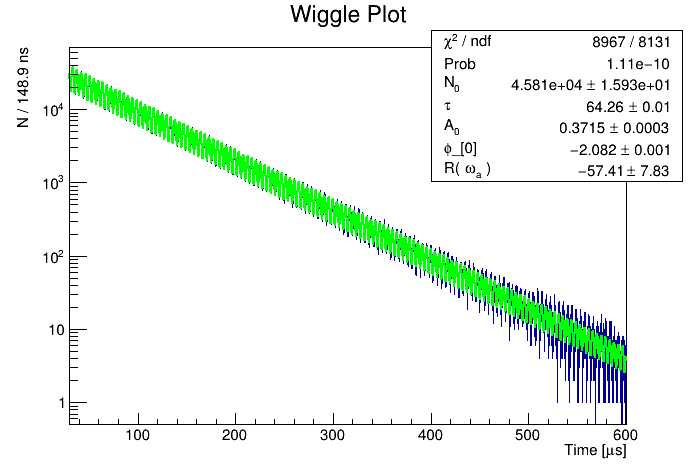

In [22]:
"""
Fit using 5 parameters
"""
h3 = h.ProjectionX("_px", binLow, binHigh).Clone("h3")
h3.GetYaxis().SetTitle("N / 148.9 ns")

c = r.TCanvas()
r.gStyle.SetOptFit(1111)
r.gStyle.SetOptStat(0)
h3.Draw("colz")
h3.GetXaxis().SetRangeUser(30, 600)
h3.Fit("func_five_param", "REM")
c.SetLogy()
c.Draw()

In [23]:
"""
Fit five parameters with 12 constants
"""

def blinded_wiggle_3(x, p):
    N0          = p[0]
    T           = p[1]
    A0          = p[2]
    Phi0        = p[3]
    OmegaCBO    = 2.3048
    TCBO        = 170
    ACBON       = 0.45
    PhiCBON     = 1.8
    ACBOA       = 0.04
    PhiCBOA     = 0.5
    ACBOPhi     = 0.0004
    PhiCBOPhi   = -2
    OmegaVW     = 14.39
    TVW         = 20
    AVW         = 0.8
    PhiVW       = 0.4
    R           = p[4]
    
    time = x[0]
    omega = getBlinded.paramToFreq(R)
    
    return ( N0*( 1 + ACBON*math.exp(-time/TCBO)*math.cos(OmegaCBO*time - PhiCBON) )*
            ( 1 + AVW*math.exp(-time/TVW)*math.cos(OmegaVW*time - PhiCBON) )*
            math.exp(-time/T)*( 1 + ( A0*( 1 + ACBOA*math.exp(-time/TCBO)*math.cos(OmegaCBO*time - PhiCBOA) ) )*math.cos(omega*time - ( Phi0 + ACBOPhi*math.exp(-time/TCBO)*math.cos(OmegaCBO*time - PhiCBOPhi) )) ) )




func_3 = r.TF1("func_3", blinded_wiggle_3, 30, 600, 5)


pars = {'N_{0}'           : 3.406*(10**6),
        '#tau'            : 64.438,
        'A_{0}'           : 37.587,
        '#phi_[0]'        : -2.0909,
        'R( #omega_{a} )' : 0}

i = 0
for name, value in pars.items():
    func_3.SetParName(i, name)
    func_3.SetParameter(i, value)
    i += 1

func_3.SetLineColor(3)
func_3.SetNpx(10000)

 FCN=1.06477e+06 FROM MINOS     STATUS=SUCCESSFUL     38 CALLS         769 TOTAL
                     EDM=2.3015e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  N_{0}        4.25362e+04   1.48219e+01   2.94600e-03   1.55942e-08
   2  #tau         6.56044e+01   1.28603e-02  -7.95366e-06  -6.11706e-05
   3  A_{0}        3.70212e-01   2.64357e-04  -2.23054e-07  -3.25112e-03
   4  #phi_[0]    -2.12737e+00   1.30964e-03   7.94540e-09  -1.98663e-04
   5  R( #omega_{a} )  -2.51438e+02   7.79563e+00   7.79563e+00   1.51606e-07


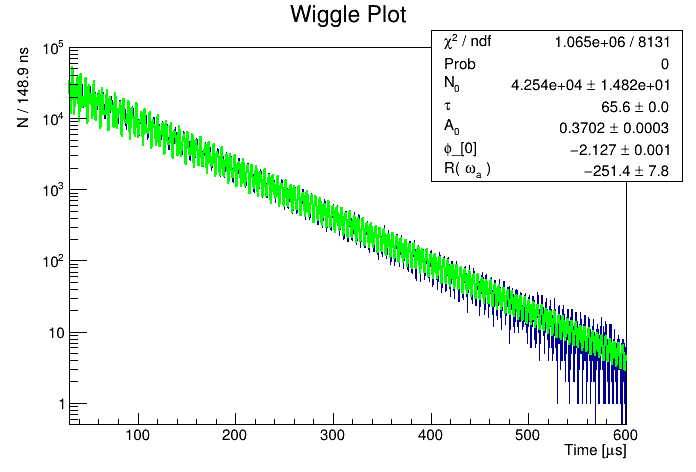

In [24]:
"""
Fit using 5 parameters and 12 constants
"""
h4 = h.ProjectionX("_px", binLow, binHigh).Clone("h4")
h4.GetYaxis().SetTitle("N / 148.9 ns")

c = r.TCanvas()
r.gStyle.SetOptFit(1111)
r.gStyle.SetOptStat(0)
h4.Draw("colz")
h4.GetXaxis().SetRangeUser(30, 600)
h4.Fit("func_3", "REM")
c.SetLogy()
c.Draw()

Going in one correction function at a time:

In [25]:
"""
Fit five parameters with correction
"""

def blinded_wiggle_4(x, p):
    N0          = p[0]
    T           = p[1]
    A0          = p[2]
    Phi0        = p[3]
    R           = p[4]
    OmegaCBO    = p[5]
    TCBO        = p[6]
    ACBON       = p[7]
    PhiCBON     = p[8]
    #ACBOA       = p[9]
    #PhiCBOA     = p[10]
    #ACBOPhi     = p[11]
    #PhiCBOPhi   = p[12]
    #OmegaVW     = p[13]
    #TVW         = p[14]
    #AVW         = p[15]
    #PhiVW       = p[16]
    
    
    time = x[0]
    omega = getBlinded.paramToFreq(R)
    """
    # Ncbo(t)
    Ncbo_t = 1 + ACBON * math.exp(-time / TCBO) * math.cos(OmegaCBO*time - PhiCBON)

    # Nvw(t)
    Nvw_t = 1 + AVW * math.exp(-time/TVW) * math.cos(OmegaVW*time - PhiCBON)

    # Phi(t)
    Phi_t = Phi0 + ACBOPhi*math.exp(-time/TCBO)*math.cos(OmegaCBO*time - PhiCBOPhi)

    # A(t)
    A_t = A0 * ( 1 + ACBOA*math.exp(-time/TCBO)*math.cos(OmegaCBO*time - PhiCBOA) )
    """
    #Ncbo_t = 1
    Nvw_t = 1
    Phi_t = Phi0
    A_t = A0
    
    return N0 * (1 + ACBON * math.exp(-time / TCBO) * math.cos(OmegaCBO*time - PhiCBON)) * Nvw_t * math.exp(-time/T) * (1 + A_t * math.cos(omega - Phi_t))




func_4 = r.TF1("func_4", blinded_wiggle_4, 30, 600, 9)

pars = {'N_{0}'           : 4.577*(10**4),
        '#tau'            : 64.3,
        'A_{0}'           : -0.37,
        '#phi_[0]'        : 1.059,
        'R( #omega_{a} )' : 0.0,
        '#omega_{CBO}'    : 2.3,
        '#tau_{CBO}'      : 170,
        'A_{CBO, N}'      : .45,
        '#phi_{CBO, N}'   : 1.8 #,
        #'A_{CBO, A}'      : 0.04,
        #'#phi_{CBO, A}'   : 0.5,
        #'A_{CBO, #phi}'   : 0.0004,
        #'#phi_{CBO, #phi}': -2,
        #'#omega_{VW}'     : 14.39,
        #'#tau_{VW}'       : 20,
        #'A_{VW}'          : 0.8,
        #'#phi_{VW}'       : 0.4
       }

i = 0
for name, value in pars.items():
    func_4.SetParName(i, name)
    func_4.SetParameter(i, value)
    i += 1

func_4.SetLineColor(3)
func_4.SetNpx(10000)

 FCN=9996.41 FROM MIGRAD    STATUS=CALL LIMIT   2322 CALLS        2323 TOTAL
                     EDM=66.0151    STRATEGY= 1  ERROR MATRIX UNCERTAINTY  16.0 per cent
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  N_{0}        1.04774e+05   3.32220e+02   5.22684e+02  -4.84781e-02
   2  #tau         6.42516e+01   1.10666e-02   4.47301e-04  -1.14835e+02
   3  A_{0}        4.11432e+01   2.22529e-01   3.46756e-01   1.58885e+02
   4  #phi_[0]     3.69909e-02   3.92570e-04   2.45126e-05  -4.77887e+05
   5  R( #omega_{a} )   1.26401e+05   2.72708e+02  -1.67670e+01   6.87907e-01
   6  #omega_{CBO}   1.43946e+00   1.11006e-05   9.18729e-06   1.07171e+06
   7  #tau_{CBO}   3.48766e+03   1.86935e+01   2.91435e+01  -4.76825e-01
   8  A_{CBO, N}   3.81352e-01   2.76878e-04   7.46400e-06  -1.52619e+03
   9  #phi_{CBO, N}  -2.72141e+01   1.28712e-03   4.55335e-04  -7.32399e+03


Warning in <Fit>: Abnormal termination of minimization.


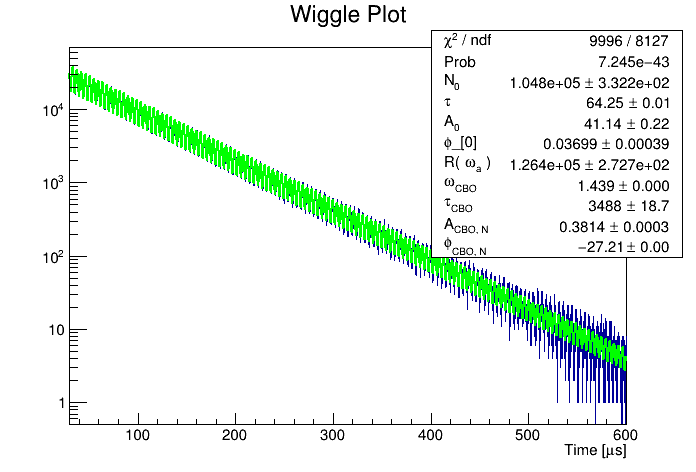

In [26]:
"""
Fit using 5 parameters and Ncbo correction
"""
h5 = h.ProjectionX("_px", binLow, binHigh).Clone("h5")
h5.GetYaxis().SetTitle("N / 148.9 ns")

c = r.TCanvas()
r.gStyle.SetOptFit(1111)
r.gStyle.SetOptStat(0)
h5.Draw("colz")
h5.GetXaxis().SetRangeUser(30, 600)
h5.Fit("func_4", "REM")
c.SetLogy()
c.Draw()

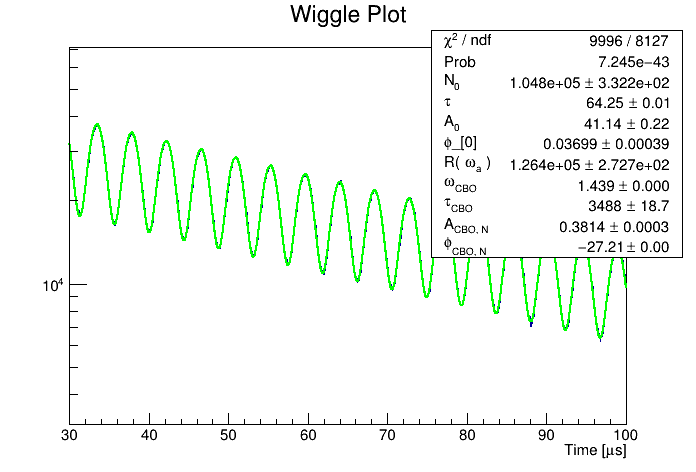

In [27]:
h5.GetXaxis().SetRangeUser(30, 100)
h5.Draw()
c.Draw()

In [55]:
"""
Fit using five parameters and the NCBO and NVW corrections
"""
def blinded_wiggle_5(x, p):
    N0          = p[0]
    T           = p[1]
    A0          = p[2]
    Phi0        = p[3]
    R           = p[4]
    OmegaCBO    = p[5]
    TCBO        = p[6]
    ACBON       = p[7]
    PhiCBON     = p[8]
    OmegaVW     = p[9]
    TVW         = p[10]
    AVW         = p[11]
    PhiVW       = p[12]
    #ACBOA       = p[9]
    #PhiCBOA     = p[10]
    #ACBOPhi     = p[11]
    #PhiCBOPhi   = p[12]
    
    
    
    time = x[0]
    omega = getBlinded.paramToFreq(R)
    """
    # Ncbo(t)
    Ncbo_t = 1 + ACBON * math.exp(-time / TCBO) * math.cos(OmegaCBO*time - PhiCBON)

    # Nvw(t)
    Nvw_t = 1 + AVW * math.exp(-time/TVW) * math.cos(OmegaVW*time - PhiCBON)

    # Phi(t)
    Phi_t = Phi0 + ACBOPhi*math.exp(-time/TCBO)*math.cos(OmegaCBO*time - PhiCBOPhi)

    # A(t)
    A_t = A0 * ( 1 + ACBOA*math.exp(-time/TCBO)*math.cos(OmegaCBO*time - PhiCBOA) )
    """
    #Ncbo_t = 1
    #Nvw_t = 1
    Phi_t = Phi0
    A_t = A0
    
    return (N0 * (1 + ACBON * math.exp(-time / TCBO) * math.cos(OmegaCBO*time - PhiCBON)) * 
            (1 + AVW * math.exp(-time/TVW) * math.cos(OmegaVW*time - PhiCBON)) * 
            math.exp(-time/T) * (1 + A_t * math.cos(omega - Phi_t)))




func_5 = r.TF1("func_5", blinded_wiggle_5, 30, 600, 13)

pars = {'N_{0}'           : 1.048*(10**5),
        '#tau'            : 64.25,
        'A_{0}'           : 41.14,
        '#phi_[0]'        : 0.037,
        'R( #omega_{a} )' : 0,
        '#omega_{CBO}'    : 1.439,
        '#tau_{CBO}'      : 3488,
        'A_{CBO, N}'      : .38,
        '#phi_{CBO, N}'   : -27.21,
        '#omega_{VW}'     : 14.39,
        '#tau_{VW}'       : 200,
        'A_{VW}'          : 0.8,
        '#phi_{VW}'       : 0.4 #,
        #'A_{CBO, A}'      : 0.04,
        #'#phi_{CBO, A}'   : 0.5,
        #'A_{CBO, #phi}'   : 0.0004,
        #'#phi_{CBO, #phi}': -2
        
       }

i = 0
for name, value in pars.items():
    func_5.SetParName(i, name)
    func_5.SetParameter(i, value)
    i += 1

func_5.SetLineColor(3)
func_5.SetNpx(10000)

 NEW MINIMUM FOUND.  GO BACK TO MINIMIZATION STEP.
                                                  V
                                                  V
                                                  V
                                               VVVVVVV
                                                VVVVV
                                                 VVV
                                                  V

 FCN=8962.11 FROM MINOS     STATUS=FAILURE       831 CALLS       20922 TOTAL
                     EDM=5.9151e-07    STRATEGY= 1  ERROR MATRIX UNCERTAINTY 100.0 per cent
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  N_{0}        6.06685e+04   1.18421e+01   0.00000e+00   2.16524e-07
   2  #tau         6.42615e+01   7.06248e-03  -0.00000e+00   5.04464e-04
   3  A_{0}        2.20820e+01   1.32834e-02  -0.00000e+00  -1.93055e-04
   4  #phi_[0]    -5.26889e-02   6.67433e-06  

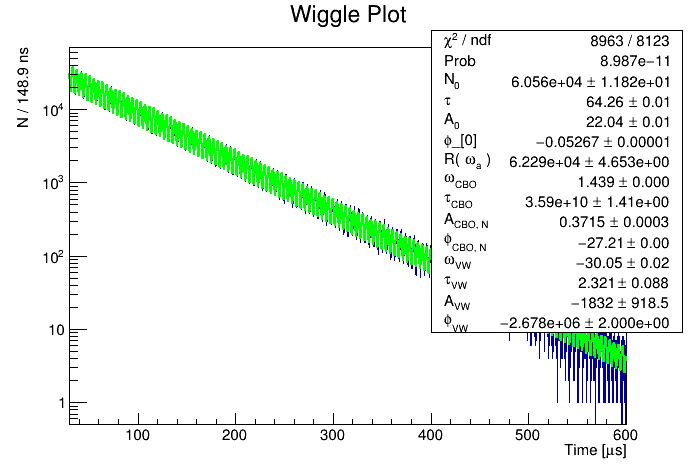

In [56]:
"""
Fit using 5 parameters and NCBO + NVW corrections
"""
h6 = h.ProjectionX("_px", binLow, binHigh).Clone("h6")
h6.GetYaxis().SetTitle("N / 148.9 ns")

c = r.TCanvas()
r.gStyle.SetOptFit(1111)
r.gStyle.SetOptStat(0)
h6.Draw("colz")
h6.GetXaxis().SetRangeUser(30, 600)
h6.Fit("func_5", "REM")
c.SetLogy()
c.Draw()

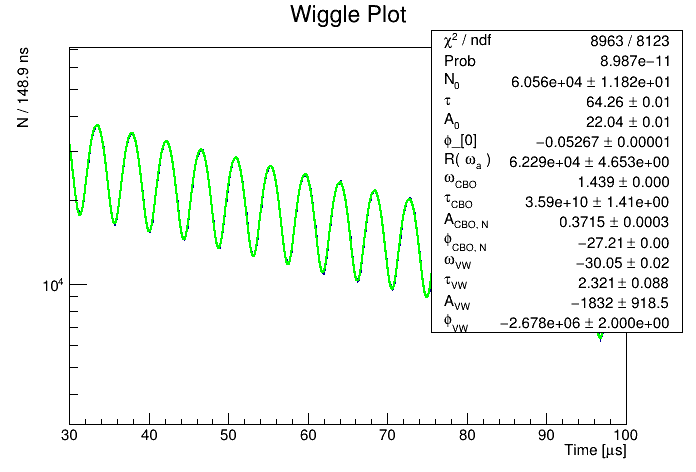

In [57]:
h6.GetXaxis().SetRangeUser(30, 100)
h6.Draw()
c.Draw()

In [58]:
"""
Fit using five parameters and the NCBO, NVW, and A(t) corrections
"""
def blinded_wiggle_6(x, p):
    N0          = p[0]
    T           = p[1]
    A0          = p[2]
    Phi0        = p[3]
    R           = p[4]
    OmegaCBO    = p[5]
    TCBO        = p[6]
    ACBON       = p[7]
    PhiCBON     = p[8]
    OmegaVW     = p[9]
    TVW         = p[10]
    AVW         = p[11]
    PhiVW       = p[12]
    ACBOA       = p[13]
    PhiCBOA     = p[14]
    #ACBOPhi     = p[11]
    #PhiCBOPhi   = p[12]
    
    
    
    time = x[0]
    omega = getBlinded.paramToFreq(R)
    """
    # Ncbo(t)
    Ncbo_t = 1 + ACBON * math.exp(-time / TCBO) * math.cos(OmegaCBO*time - PhiCBON)

    # Nvw(t)
    Nvw_t = 1 + AVW * math.exp(-time/TVW) * math.cos(OmegaVW*time - PhiCBON)

    # Phi(t)
    Phi_t = Phi0 + ACBOPhi*math.exp(-time/TCBO)*math.cos(OmegaCBO*time - PhiCBOPhi)

    # A(t)
    A_t = A0 * ( 1 + ACBOA*math.exp(-time/TCBO)*math.cos(OmegaCBO*time - PhiCBOA) )
    """
    #Ncbo_t = 1
    #Nvw_t = 1
    Phi_t = Phi0
    A_t = A0
    
    return (N0 * (1 + ACBON * math.exp(-time / TCBO) * math.cos(OmegaCBO*time - PhiCBON)) * 
            (1 + AVW * math.exp(-time/TVW) * math.cos(OmegaVW*time - PhiCBON)) * 
            math.exp(-time/T) * (1 + (A0 * ( 1 + ACBOA*math.exp(-time/TCBO)*math.cos(OmegaCBO*time - PhiCBOA) )) * math.cos(omega - Phi_t)))




func_6 = r.TF1("func_6", blinded_wiggle_6, 30, 600, 15)

pars = {'N_{0}'           : 6.056*(10**4),
        '#tau'            : 64.26,
        'A_{0}'           : 22.04,
        '#phi_[0]'        : -0.05,
        'R( #omega_{a} )' : 0,
        '#omega_{CBO}'    : 1.439,
        '#tau_{CBO}'      : 3.59*(10**10),
        'A_{CBO, N}'      : .3715,
        '#phi_{CBO, N}'   : -27.21,
        '#omega_{VW}'     : -30.05,
        '#tau_{VW}'       : 2.321,
        'A_{VW}'          : 0.-1832,
        '#phi_{VW}'       : -2.678*(10**6),
        'A_{CBO, A}'      : 0.04,
        '#phi_{CBO, A}'   : 0.5 #,
        #'A_{CBO, #phi}'   : 0.0004,
        #'#phi_{CBO, #phi}': -2
        
       }

i = 0
for name, value in pars.items():
    func_6.SetParName(i, name)
    func_6.SetParameter(i, value)
    i += 1

func_6.SetLineColor(3)
func_6.SetNpx(10000)

 NEW MINIMUM FOUND.  GO BACK TO MINIMIZATION STEP.
                                                  V
                                                  V
                                                  V
                                               VVVVVVV
                                                VVVVV
                                                 VVV
                                                  V

 FCN=8957.48 FROM MINOS     STATUS=SUCCESSFUL   2775 CALLS       55793 TOTAL
                     EDM=1.23919e-06    STRATEGY= 1  ERROR MATRIX UNCERTAINTY 100.0 per cent
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  N_{0}        4.73215e+04   9.23687e+00   2.28339e-02   6.22612e-06
   2  #tau         6.42613e+01   7.06246e-03   1.54880e-06   6.76343e-03
   3  A_{0}        1.00811e+01   5.94226e-02  -3.31963e-04  -1.04981e-03
   4  #phi_[0]    -9.22349e-02   1.87845e-05 

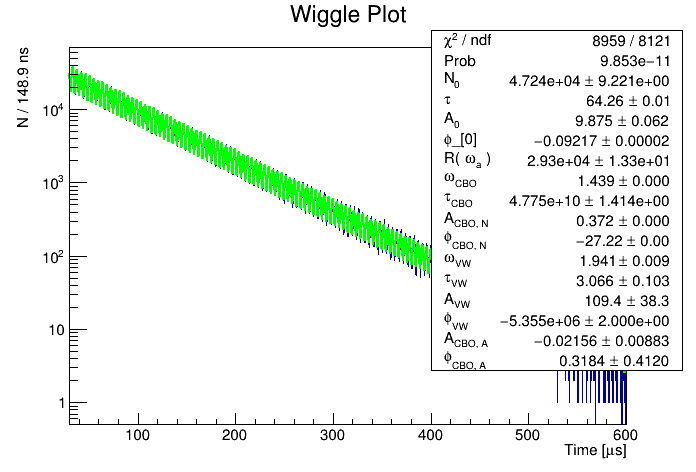

In [59]:
"""
Fit using 5 parameters and NCBO, NVW, and A(t) corrections
"""
h7 = h.ProjectionX("_px", binLow, binHigh).Clone("h7")
h7.GetYaxis().SetTitle("N / 148.9 ns")

c = r.TCanvas()
r.gStyle.SetOptFit(1111)
r.gStyle.SetOptStat(0)
h7.Draw("colz")
h7.GetXaxis().SetRangeUser(30, 600)
h7.Fit("func_6", "REM")
c.SetLogy()
c.Draw()

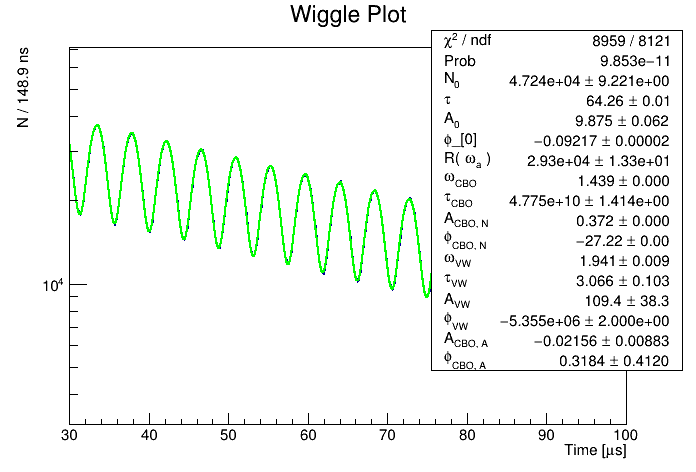

In [60]:
h7.GetXaxis().SetRangeUser(30, 100)
h7.Draw()
c.Draw()

In [69]:
"""
Fit using all corrections
"""
def blinded_wiggle_7(x, p):
    N0          = p[0]
    T           = p[1]
    A0          = p[2]
    Phi0        = p[3]
    R           = p[4]
    OmegaCBO    = p[5]
    TCBO        = p[6]
    ACBON       = p[7]
    PhiCBON     = p[8]
    OmegaVW     = p[9]
    TVW         = p[10]
    AVW         = p[11]
    PhiVW       = p[12]
    ACBOA       = p[13]
    PhiCBOA     = p[14]
    ACBOPhi     = p[15]
    PhiCBOPhi   = p[16]
    
    
    
    time = x[0]
    omega = getBlinded.paramToFreq(R)
    """
    # Ncbo(t)
    Ncbo_t = 1 + ACBON * math.exp(-time / TCBO) * math.cos(OmegaCBO*time - PhiCBON)

    # Nvw(t)
    Nvw_t = 1 + AVW * math.exp(-time/TVW) * math.cos(OmegaVW*time - PhiCBON)

    # Phi(t)
    Phi_t = Phi0 + ACBOPhi*math.exp(-time/TCBO)*math.cos(OmegaCBO*time - PhiCBOPhi)

    # A(t)
    A_t = A0 * ( 1 + ACBOA*math.exp(-time/TCBO)*math.cos(OmegaCBO*time - PhiCBOA) )
    """
    #Ncbo_t = 1
    #Nvw_t = 1
    #Phi_t = Phi0
    #A_t = A0
    
    return (N0 * (1 + ACBON * math.exp(-time / TCBO) * math.cos(OmegaCBO*time - PhiCBON)) * 
            (1 + AVW * math.exp(-time/TVW) * math.cos(OmegaVW*time - PhiCBON)) * 
            math.exp(-time/T) * (1 + (A0 * ( 1 + ACBOA*math.exp(-time/TCBO)*math.cos(OmegaCBO*time - PhiCBOA) )) * math.cos(omega - (Phi0 + ACBOPhi*math.exp(-time/TCBO)*math.cos(OmegaCBO*time - PhiCBOPhi)))))




func_7 = r.TF1("func_7", blinded_wiggle_7, 30, 600, 17)

pars = {'N_{0}'           : 4.724*(10**4),
        '#tau'            : 64.26,
        'A_{0}'           : 9.875,
        '#phi_[0]'        : -0.09,
        'R( #omega_{a} )' : 0,
        '#omega_{CBO}'    : 1.439,
        '#tau_{CBO}'      : 4.775*(10**10),
        'A_{CBO, N}'      : .372,
        '#phi_{CBO, N}'   : -27.22,
        '#omega_{VW}'     : 1.941,
        '#tau_{VW}'       : 3.066,
        'A_{VW}'          : 109.4,
        '#phi_{VW}'       : -5.355*(10**6),
        'A_{CBO, A}'      : -0.02156,
        '#phi_{CBO, A}'   : 0.3184,
        'A_{CBO, #phi}'   : 0.0004,
        '#phi_{CBO, #phi}': -2
        }

i = 0
for name, value in pars.items():
    func_7.SetParName(i, name)
    func_7.SetParameter(i, value)
    i += 1

func_7.SetLineColor(3)
func_7.SetNpx(10000)

 FCN=8966.81 FROM MIGRAD    STATUS=CALL LIMIT   4179 CALLS        4180 TOTAL
                     EDM=inf    STRATEGY= 1  ERROR MATRIX UNCERTAINTY 100.0 per cent
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  N_{0}        4.41115e+04   8.61047e+00   3.97894e-01  -2.25161e-02
   2  #tau         6.42625e+01   7.06258e-03   3.26575e-04  -5.88811e+00
   3  A_{0}        3.50100e+00   1.83862e-02   8.53625e-04  -8.13218e+00
   4  #phi_[0]    -1.05157e-01   5.91151e-05   2.68071e-06  -3.81497e+03
   5  R( #omega_{a} )   1.05296e+04   4.10671e+01   1.86223e+00   5.49157e-03
   6  #omega_{CBO}   1.43943e+00   6.36327e-06   6.86373e-07  -4.28249e+04
   7  #tau_{CBO}   7.13526e+05   5.34072e+05   2.67822e+02  -2.42982e-06
   8  A_{CBO, N}   3.67787e-01   2.60968e-04   1.20688e-05   1.41965e+03
   9  #phi_{CBO, N}  -2.72279e+01   7.34554e-04   3.39883e-05   1.46926e+02
  10  #omega_{VW}   1.38350

Warning in <Fit>: Abnormal termination of minimization.


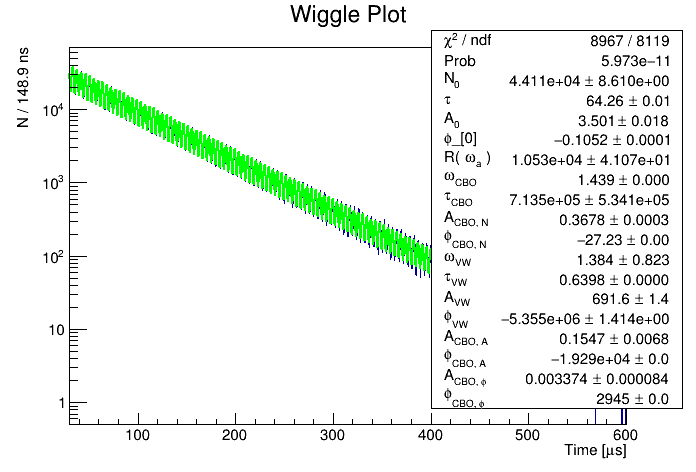

In [70]:
"""
Fit using 5 parameters and all corrections
"""
h8 = h.ProjectionX("_px", binLow, binHigh).Clone("h8")
h8.GetYaxis().SetTitle("N / 148.9 ns")

c = r.TCanvas()
r.gStyle.SetOptFit(1111)
r.gStyle.SetOptStat(0)
h8.Draw("colz")
h8.GetXaxis().SetRangeUser(30, 600)
h8.Fit("func_7", "REM")
c.SetLogy()
c.Draw()

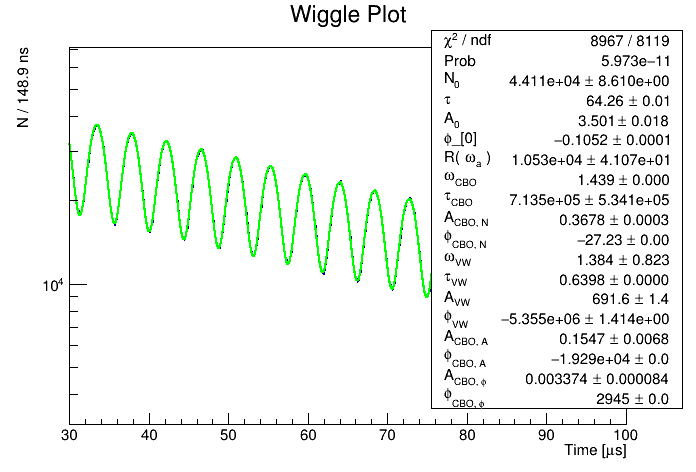

In [71]:
h8.GetXaxis().SetRangeUser(30, 100)
h8.Draw()
c.Draw()

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

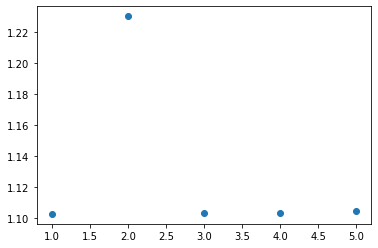

In [76]:
data = [[1, 8967/8131], [2, 9996/8127], [3, 8963/8123], [4, 8959/8121], [5, 8969/8119]]

df = pd.DataFrame(data, columns = ['N', 'ChiSq'])

fig, ax = plt.subplots(1,1)

ax.plot(df['N'], df['ChiSq'], linestyle='none', marker='o')